In [6]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"]=True
import statsmodels.api as sm
import numpy as np
datos= pd.read_excel("teslas.xlsx")
datos.columns=["corriente", "campo"]

# Ajuste lineal

In [10]:
X = sm.add_constant(datos.corriente)
Y = datos.campo
model = sm.OLS(Y,X).fit()
print(model.summary())
x = datos.corriente

                            OLS Regression Results                            
Dep. Variable:                  campo   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.367e+04
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           1.01e-54
Time:                        09:32:38   Log-Likelihood:                -62.574
No. Observations:                  40   AIC:                             129.1
Df Residuals:                      38   BIC:                             132.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1179      0.390      2.868      0.0

In [36]:
x1 = np.linspace(0,10,2)
linea_arriba = lambda dato, ci_sup_ordenada, ci_sup_pendiente : ci_sup_ordenada + ci_sup_pendiente*dato; y_arriba = linea_arriba(x1,  1.907,10.143  )
linea_abajo = lambda dato, ci_inf_ordenada, ci_inf_pendiente : ci_inf_ordenada + ci_inf_pendiente*dato; y_abajo = linea_abajo(x1,0.329 ,  9.880 )

Text(0.5, 1.0, 'Curva de calibración')

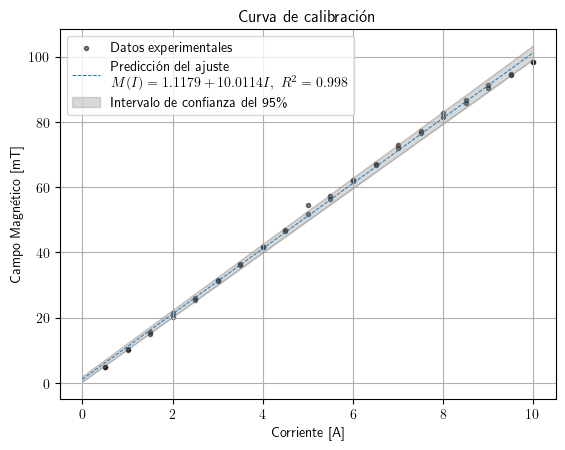

In [53]:
plt.scatter(x = datos.corriente, y = datos.campo, marker = ".", alpha=0.5,c = "black", label = "Datos experimentales")
plt.plot(x,1.1179  + 10.0114*x , linestyle = "--",lw = 0.7, label = "Predicción del ajuste\n $M(I) = 1.1179 + 10.0114 I,~ R^2 = 0.998 $")
plt.plot(x1,y_arriba,c = "black", lw = 0.1)
plt.plot(x1, y_abajo, c = "black", lw = 0.1)
plt.fill_between(x1, y_arriba, y_abajo,where = (y_abajo < y_arriba), color = "grey", alpha = 0.3, label ="Intervalo de confianza del 95\% " )

plt.grid(); plt.legend(); plt.xlabel("Corriente [A]"); plt.ylabel("Campo Magnético [mT]"); plt.title("Curva de calibración")


# Ajuste polinomial

In [22]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Datos de ejemplo
x = np.array(datos.corriente)
y = np.array(datos.campo)

# Crear matriz de características para el ajuste ax^2 + bx + c
X = np.column_stack((x**2, x, np.ones_like(x)))

# Ajustar un modelo polinomial de segundo orden: ax^2 + bx + c
modelo = sm.OLS(y, X).fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.510e+04
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           2.24e-61
Time:                        09:36:43   Log-Likelihood:                -40.320
No. Observations:                  40   AIC:                             86.64
Df Residuals:                      37   BIC:                             91.71
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1279      0.015     -8.693      0.0

In [19]:
x = 
x

array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10. ,  9.5,
        9. ,  8.5,  8. ,  7.5,  7. ,  6.5,  6. ,  5.5,  5. ,  4.5,  4. ,
        3.5,  3. ,  2.5,  2. ,  1.5,  1. ,  0.5])